# Entanglement generation and characterization using metamaterial resonators

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from numpy import *
from qutip import *
from IPython.display import Image
from numpy.linalg import *
import multiprocessing as mp
import scipy.constants as sc
import time
import datetime
import os
from matplotlib import cm
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['figure.dpi'] = 100

saveImages = False

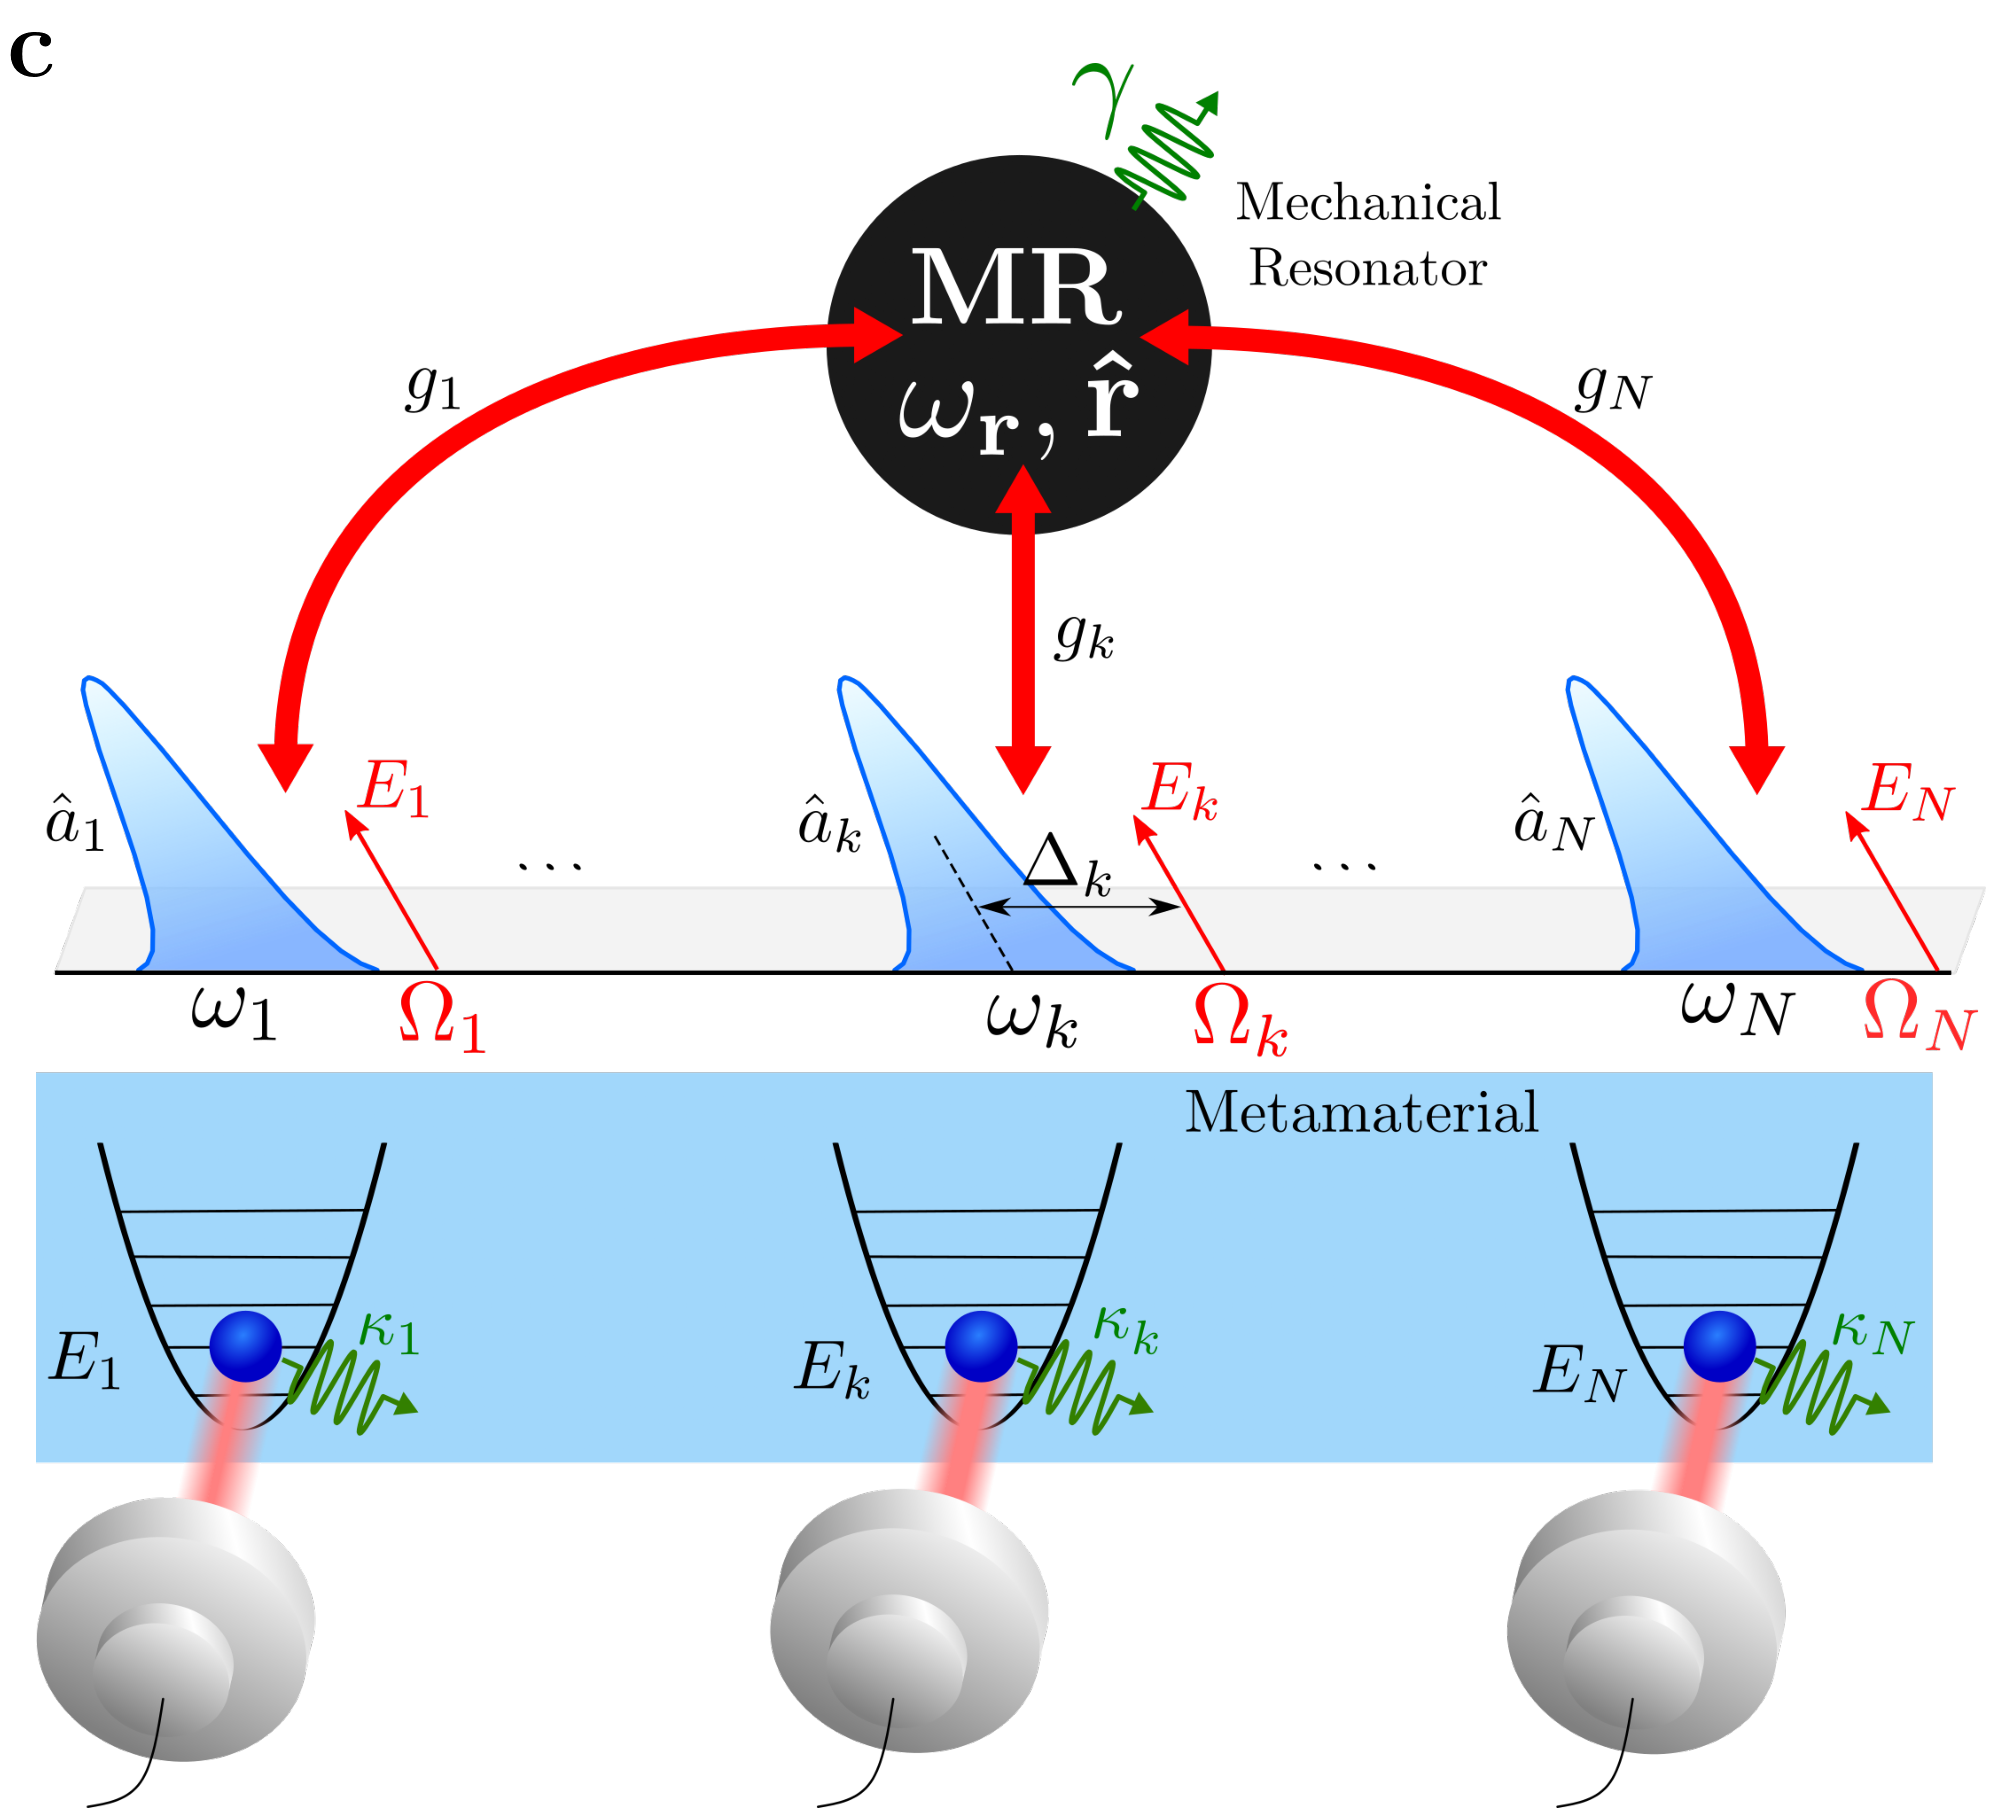

In [2]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

img3 = mpimg.imread(r'Images\Metamaterial_MR_system_schematic.png')

axes.text(-30, 15, r"$\mathbf{c}$", color='black', fontsize=70)

plt.axis('off')
plt.imshow(img3)
plt.tight_layout()
if(saveImages == True):
    plt.savefig(r'Results/fig03_Metamaterial_MR_system_schematic_pdf.pdf')
    plt.savefig(r'Results/fig03_Metamaterial_MR_system_schematic_png.png')
plt.show()

## 1. Metamaterial Circuit Resonator

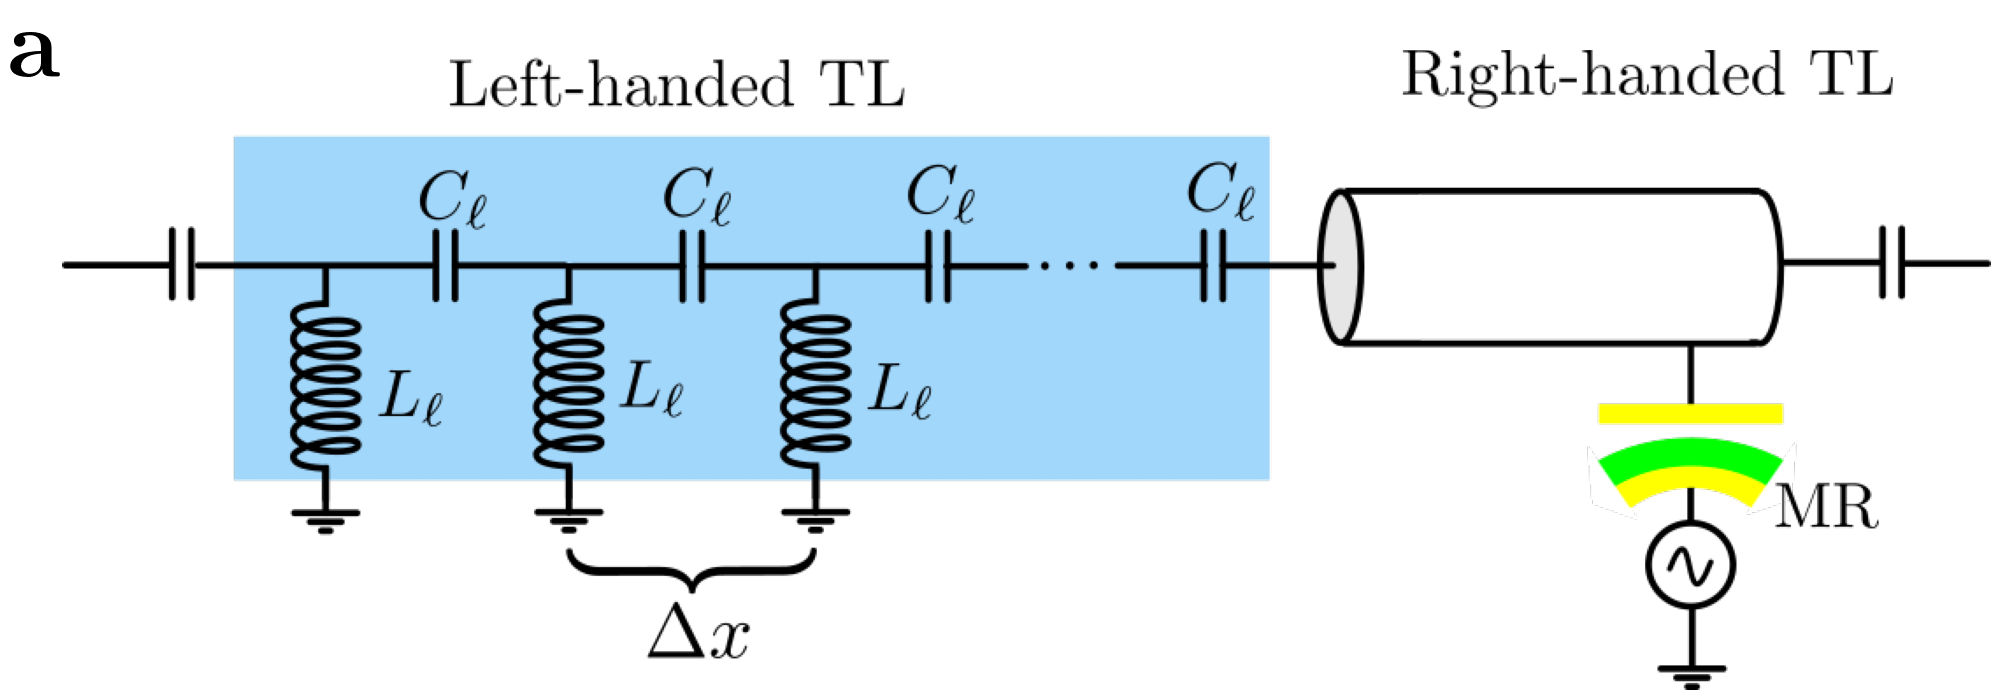

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

img1 = mpimg.imread(r'Images\CTL_MechanicResonator_circuit_model.png')

axes.text(-30, 15, r"$\mathbf{a}$", color='black', fontsize=70)

plt.axis('off')
plt.imshow(img1)
plt.tight_layout()
if(saveImages == True):
    plt.savefig(r'Results/fig01_CTL_MechanicResonator_circuit_model_pdf.pdf')
    plt.savefig(r'Results/fig01_CTL_MechanicResonator_circuit_model_png.png')
plt.show()

In [4]:
characteristic_Impedance = 50  # Ohm
infrared_cutoff = 2 * pi * 5 * 1e9  # 5 GHz

capacitance_per_cell = (1 / (2 * infrared_cutoff * characteristic_Impedance))
inductance_per_cell = (characteristic_Impedance / (2 * infrared_cutoff))

print('Capacitance (C) = %.3f fF/cell' % (capacitance_per_cell*1e15))
print('Inductance (L) = %.3f pH/cell' % (inductance_per_cell*1e12))

Capacitance (C) = 318.310 fF/cell
Inductance (L) = 795.775 pH/cell


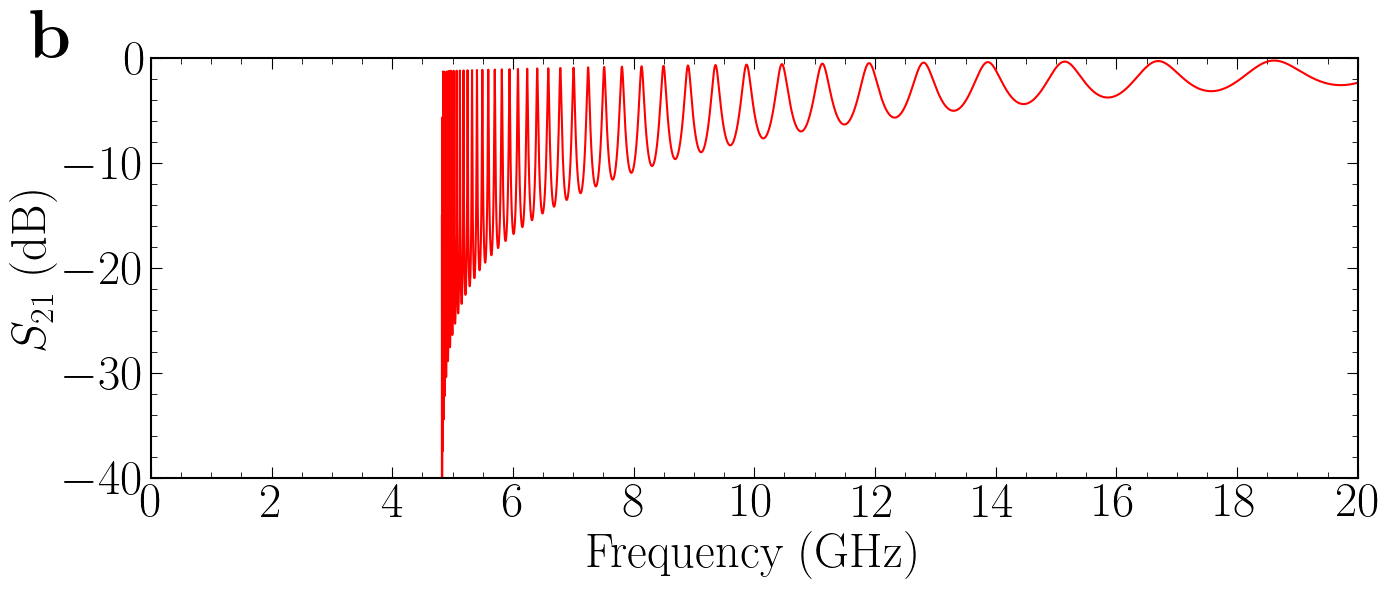

In [5]:
data_s21_artigo = loadtxt(r'Data/S21parameter_cutoff5GHz.txt')

x_list_s21artigo = data_s21_artigo[:,0]
y_list_s21artigo = data_s21_artigo[:,1]

fig, axes1 = plt.subplots(1, 1, figsize=(14, 6)) #14,7

axes1.plot(x_list_s21artigo, y_list_s21artigo, color='red', linestyle='-', label=r'Delta', lw=1.5)

axes1.set_xlabel(r'Frequency (GHz)', rotation=0, fontsize=35)
axes1.set_ylabel(
    r'$S_{21}$ (dB)', rotation=90, fontsize=35)

axes1.tick_params(axis='both', which='major', length = 8, direction='in', labelsize=35)
axes1.tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=35)
#axes1.yaxis.tick_right()
axes1.xaxis.set_ticks_position('both')
axes1.yaxis.set_ticks_position('both')
#axes1.legend(loc=2, fontsize=23, frameon=False)

#axes1.set_xlim(0, 5778.04)
axes1.set_ylim(-40, 0)
axes1.set_xlim(0, 20)

start, end = axes1.get_ylim()
axes1.xaxis.set_ticks(arange(0, 20+1, 2))
axes1.yaxis.set_ticks(arange(start, end+1, 10))

axes1.xaxis.set_minor_locator(AutoMinorLocator())
axes1.yaxis.set_minor_locator(AutoMinorLocator())

axes1.set_ylim(-40, 0)
axes1.set_xlim(0, 20)

axes1.text(-2, 0, r"$\mathbf{b}$", color='black', fontsize=50)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()

if( saveImages == True):
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.pdf')
plt.show()

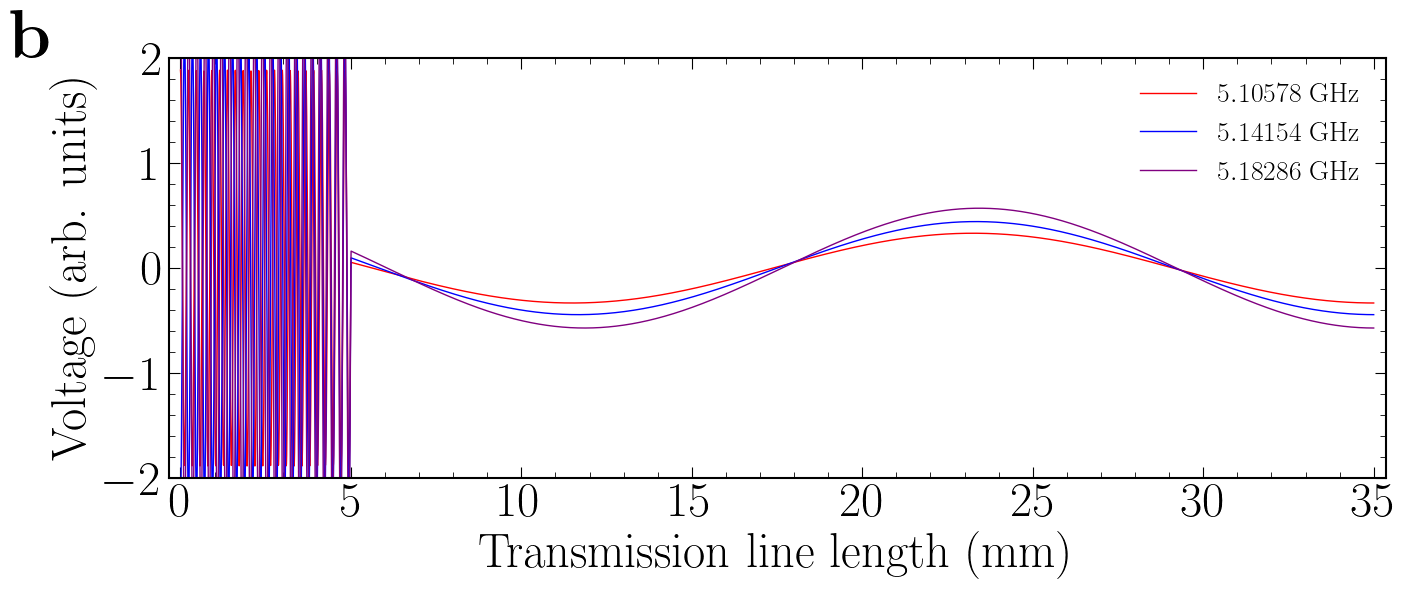

In [6]:
###############################
# Parameters from Mathematica calcultations
# Right-handed capacitance per unit of length = 0.1667 fF/um
# Right-handed inductance per unit of length = 0.4167 pH/um
# Left-handed capacitance = 318.310 fF
# Left-handed inductance  = 795.775 pH
# Number of unit cells = 50
# Unit cell length = Delta x = 100 um
# Right-handed TL length = 30 mm 
###############################

data_voltageMode1_fromMathematica = loadtxt(r'Data\data1_freq5105779.txt')
data_voltageMode2_fromMathematica = loadtxt(r'Data\data2_freq5141539.txt')
data_voltageMode3_fromMathematica = loadtxt(r'Data\data3_freq5182859.txt')

x1_list_length = data_voltageMode1_fromMathematica[:,0]*1000 + 5
y1_list_voltage = data_voltageMode1_fromMathematica[:,1]

x2_list_length = data_voltageMode2_fromMathematica[:,0]*1000  + 5
y2_list_voltage = data_voltageMode2_fromMathematica[:,1]

x3_list_length = data_voltageMode3_fromMathematica[:,0]*1000 + 5
y3_list_voltage = data_voltageMode3_fromMathematica[:,1]

fig, axes2 = plt.subplots(1, 1, figsize=(14, 6)) #14,7

axes2.plot(x1_list_length, y1_list_voltage, color='red', linestyle='-', label=r'$5.10578$ GHz', lw=1.)
axes2.plot(x2_list_length, y2_list_voltage, color='blue', linestyle='-', label=r'$5.14154$ GHz', lw=1.)
axes2.plot(x3_list_length, y3_list_voltage, color='purple', linestyle='-', label=r'$5.18286$ GHz', lw=1.)

axes2.set_xlabel(r'Transmission line length (mm)', rotation=0, fontsize=35)
axes2.set_ylabel(r'Voltage (arb. units)', rotation=90, fontsize=35)

axes2.tick_params(axis='both', which='major', length = 8, direction='in', labelsize=35)
axes2.tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=35)
#axes2.yaxis.tick_right()
axes2.xaxis.set_ticks_position('both')
axes2.yaxis.set_ticks_position('both')
#axes2.legend(loc=2, fontsize=23, frameon=False)

#axes2.set_xlim(0, 5778.04)
#axes2.set_ylim(-40, 0)
axes2.set_ylim(-2, 2)

#start, end = axes2.get_ylim()
axes2.xaxis.set_ticks(arange(0, 35+1, 5))
#axes2.yaxis.set_ticks(arange(start, end+1, 10))

axes2.xaxis.set_minor_locator(AutoMinorLocator())
axes2.yaxis.set_minor_locator(AutoMinorLocator())

#axes2.set_ylim(-40, 0)
#axes2.set_xlim(0, 20)

axes2.text(-5, 2, r"$\mathbf{b}$", color='black', fontsize=50)
#axes2.text(-5, -1.5, r"Right-handed", color='black', fontsize=30)
#axes2.text(10, -1.5, r"Left-handed", color='black', fontsize=30)


axes2.legend(loc=1,fontsize=20,frameon=False)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()



if( saveImages == True):
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.pdf')
plt.show()

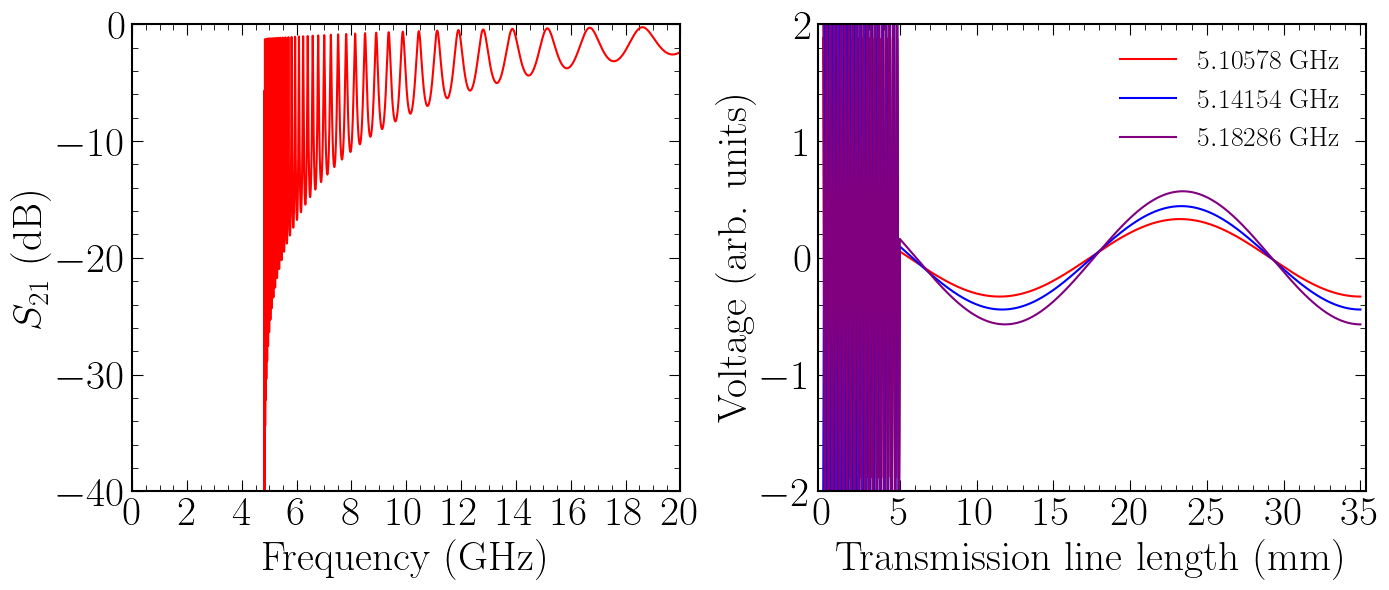

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

axes[0].plot(x_list_s21artigo, y_list_s21artigo, color='red', linestyle='-', label=r'Delta', lw=1.5)

axes[0].set_xlabel(r'Frequency (GHz)', rotation=0, fontsize=30)
axes[0].set_ylabel(
    r'$S_{21}$ (dB)', rotation=90, fontsize=30)

axes[0].tick_params(axis='both', which='major', length = 8, direction='in', labelsize=30)
axes[0].tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=30)
#axes[0].yaxis.tick_right()
axes[0].xaxis.set_ticks_position('both')
axes[0].yaxis.set_ticks_position('both')
#axes[0].legend(loc=2, fontsize=23, frameon=False)

#axes[0].set_xlim(0, 5778.04)
axes[0].set_ylim(-40, 0)
axes[0].set_xlim(0, 20)

start, end = axes[0].get_ylim()
axes[0].xaxis.set_ticks(arange(0, 20+1, 2))
axes[0].yaxis.set_ticks(arange(start, end+1, 10))

axes[0].xaxis.set_minor_locator(AutoMinorLocator())
axes[0].yaxis.set_minor_locator(AutoMinorLocator())

axes[0].set_ylim(-40, 0)
axes[0].set_xlim(0, 20)

#axes[0].text(-2, 0, r"$\mathbf{b}$", color='black', fontsize=50)

axes[1].plot(x1_list_length, y1_list_voltage, color='red', linestyle='-', label=r'$5.10578$ GHz', lw=1.5)
axes[1].plot(x2_list_length, y2_list_voltage, color='blue', linestyle='-', label=r'$5.14154$ GHz', lw=1.5)
axes[1].plot(x3_list_length, y3_list_voltage, color='purple', linestyle='-', label=r'$5.18286$ GHz', lw=1.5)

axes[1].set_xlabel(r'Transmission line length (mm)', rotation=0, fontsize=30)
axes[1].set_ylabel(r'Voltage (arb. units)', rotation=90, fontsize=30)

axes[1].tick_params(axis='both', which='major', length = 8, direction='in', labelsize=30)
axes[1].tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=30)
#axes[1].yaxis.tick_right()
axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')
#axes[1].legend(loc=2, fontsize=23, frameon=False)

#axes[1].set_xlim(0, 5778.04)
#axes[1].set_ylim(-40, 0)
axes[1].set_ylim(-2, 2)

#start, end = axes[1].get_ylim()
axes[1].xaxis.set_ticks(arange(0, 35+1, 5))
#axes[1].yaxis.set_ticks(arange(start, end+1, 10))

axes[1].xaxis.set_minor_locator(AutoMinorLocator())
axes[1].yaxis.set_minor_locator(AutoMinorLocator())

#axes[1].set_ylim(-40, 0)
#axes[1].set_xlim(0, 20)

#axes[1].text(-10, 2, r"$\mathbf{b}$", color='black', fontsize=50)
#axes[1].text(-5, -1.5, r"Right-handed", color='black', fontsize=30)
#axes[1].text(10, -1.5, r"Left-handed", color='black', fontsize=30)


axes[1].legend(loc=1,fontsize=20,frameon=False)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()

if( saveImages == True):
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.pdf')
plt.show()

## 2. Temperature and dimension test

In [8]:
w_test1 = 2 * pi * 10 * 1e6   # Test frequency = 10 MHz
w_test2 = 2 * pi * 20 * 1e6   # Test frequency = 20 MHz
w_test3 = 2 * pi * 50 * 1e6   # Test frequency = 50 MHz
w_test4 = 2 * pi * 100 * 1e6  # Test frequency = 100 MHz

w_test5 = 2 * pi * 1 * 1e9  # Test frequency = 1 GHz
w_test6 = 2 * pi * 5 * 1e9  # Test frequency = 5 GHz

test_frequencies = [w_test1, w_test2, w_test3, w_test4, w_test5, w_test6]

test_temperatures = linspace(0.001, 0.1, 200) 
test_dimensions = arange(3,16,1)                        

list_exc0_temp_vs_dim_freq = []
list_exc1_temp_vs_dim_freq = []
list_exc2_temp_vs_dim_freq = []
list_exc3_temp_vs_dim_freq = []
list_exc4_temp_vs_dim_freq = []

for k in test_frequencies:
    list_exc0_temp_vs_dim = []
    list_exc1_temp_vs_dim = []
    list_exc2_temp_vs_dim = []
    list_exc3_temp_vs_dim = []
    list_exc4_temp_vs_dim = []
    for i in test_temperatures:
        list_exc0_dim = []
        list_exc1_dim = []
        list_exc2_dim = []
        list_exc3_dim = []
        list_exc4_dim = [] 
        for l in test_dimensions:
            w_th = (sc.k*i)/(sc.hbar)
            n_th = n_thermal(k, w_th)
            list_exc0_dim.append(real(thermal_dm(l, n_th)[0,0]))
            list_exc1_dim.append(real(thermal_dm(l, n_th)[1,1]))
            list_exc2_dim.append(real(thermal_dm(l, n_th)[2,2]))
            if l > 3:
                list_exc3_dim.append(real(thermal_dm(l, n_th)[3,3]))
                if l > 4:
                    list_exc4_dim.append(real(thermal_dm(l, n_th)[4,4]))
                else:
                    list_exc4_dim.append(0)
            else:
                list_exc3_dim.append(0)
                list_exc4_dim.append(0)

        list_exc0_temp_vs_dim.append(list_exc0_dim)
        list_exc1_temp_vs_dim.append(list_exc1_dim)
        list_exc2_temp_vs_dim.append(list_exc2_dim)
        list_exc3_temp_vs_dim.append(list_exc3_dim)
        list_exc4_temp_vs_dim.append(list_exc4_dim)
    list_exc0_temp_vs_dim_freq.append(list_exc0_temp_vs_dim)
    list_exc1_temp_vs_dim_freq.append(list_exc1_temp_vs_dim)
    list_exc2_temp_vs_dim_freq.append(list_exc2_temp_vs_dim)
    list_exc3_temp_vs_dim_freq.append(list_exc3_temp_vs_dim)
    list_exc4_temp_vs_dim_freq.append(list_exc4_temp_vs_dim)

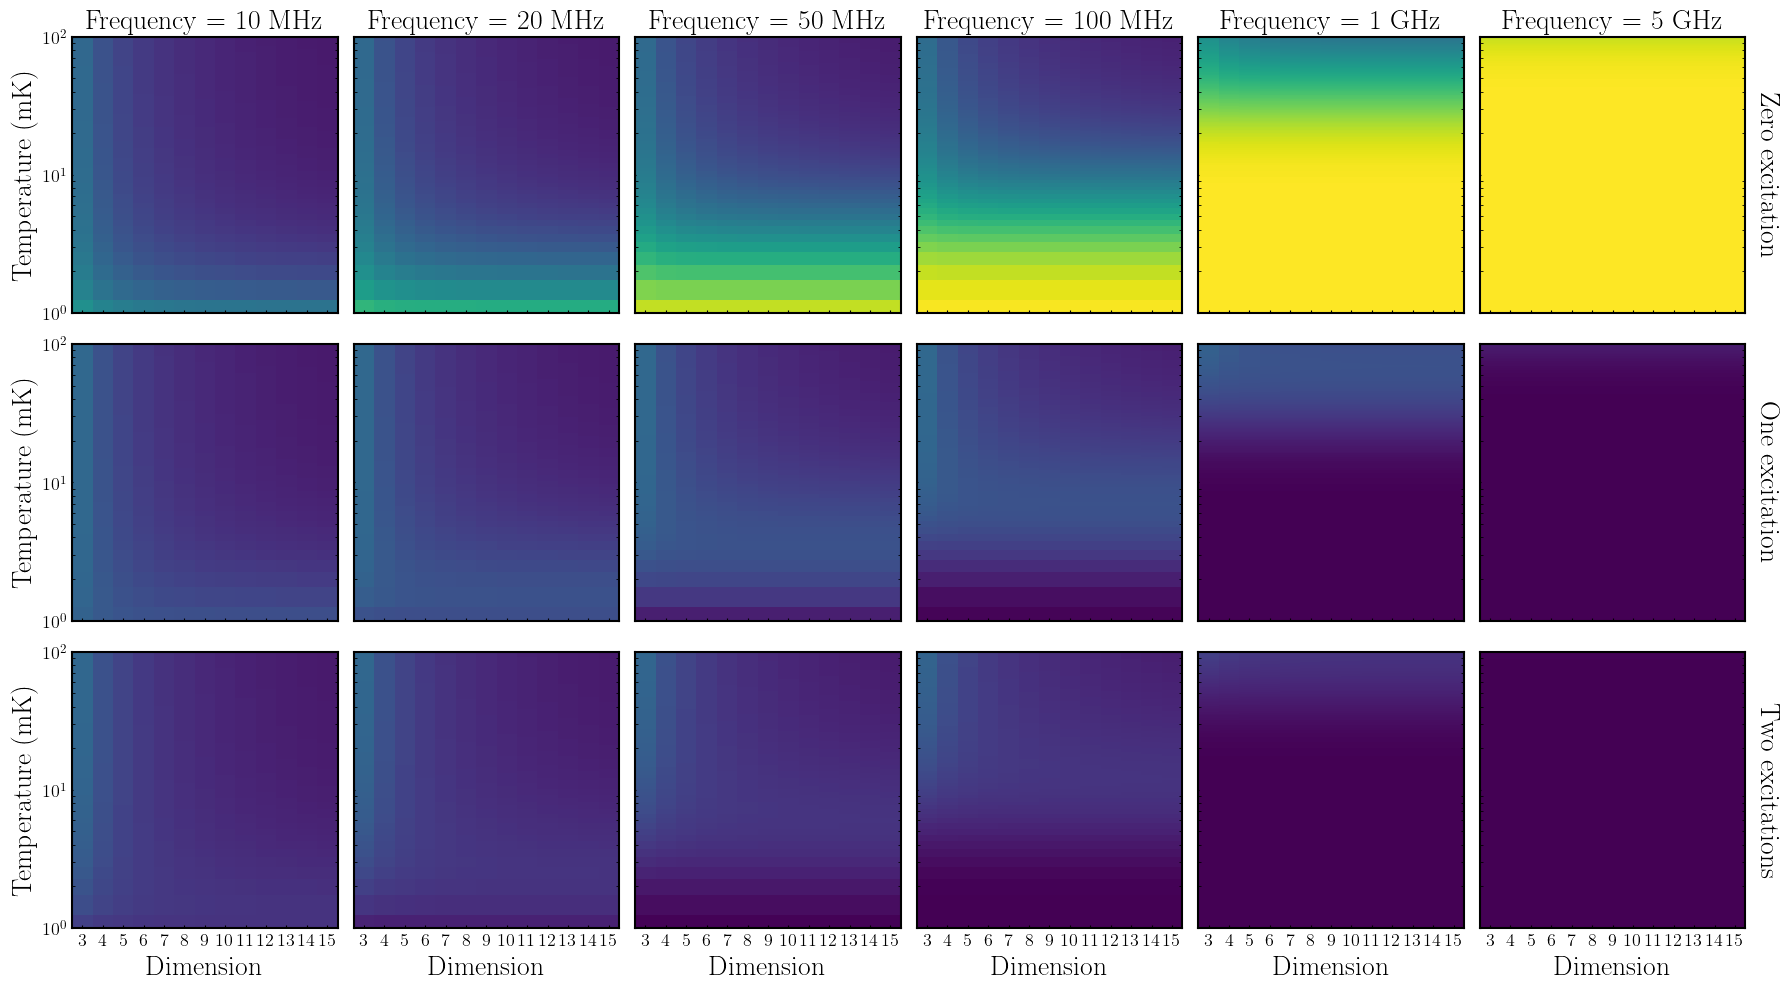

In [9]:
fig, axes = plt.subplots(3, 6, figsize=(18, 10),sharey=True,sharex=True)

Lsize = 20

nrm = mpl.colors.Normalize(0, 1)

########################
# Use 'norm = nrm' below to normalize the probability colormap from 0 to 1. Otherwise, 
# use 'norm = nrm1' (or 'norm = nrm2' or 'norm = nrm3', depending on the excitation) to
# normalize the colomap according to the local maximum.
########################

for k in range(0,len(test_frequencies)):
    nrm1 = mpl.colors.Normalize(0, max(list_exc0_temp_vs_dim_freq[k][0]))
    axes[0,k].pcolormesh(test_dimensions, test_temperatures*1000, list_exc0_temp_vs_dim_freq[k], cmap=cm.viridis, norm=nrm, shading='auto')
    axes[0,0].set_ylabel(r'Temperature (mK)', rotation=90, fontsize=Lsize)
    axes[0,5].yaxis.set_label_position("right")
    axes[0,5].set_ylabel(r'Zero excitation', labelpad = 25, rotation=270, fontsize=Lsize)
    axes[0,k].tick_params(axis='both', which='major', direction='in', labelsize=13)
    axes[0,k].tick_params(axis='both', which='minor', direction='in', labelsize=13)
    axes[0,k].xaxis.set_ticks(arange(3, 16, 1))
    axes[0,k].yaxis.set_ticks_position('both')
    axes[0,k].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[0,k].xaxis.set_tick_params(length=2)
    axes[0,k].yaxis.set_tick_params(length=1)
    axes[0,k].set_ylim(1,100)

    nrm2 = mpl.colors.Normalize(0, max(list_exc1_temp_vs_dim_freq[k][-1]))
    axes[1,k].pcolormesh(test_dimensions, test_temperatures*1000, list_exc1_temp_vs_dim_freq[k], cmap=cm.viridis, norm=nrm, shading='auto')
    axes[1,0].set_ylabel(r'Temperature (mK)', rotation=90, fontsize=Lsize)
    axes[1,5].yaxis.set_label_position("right")
    axes[1,5].set_ylabel(r'One excitation', labelpad = 25, rotation=270, fontsize=Lsize)
    axes[1,k].tick_params(axis='both', which='major', direction='in', labelsize=13)
    axes[1,k].tick_params(axis='both', which='minor', direction='in', labelsize=13)
    axes[1,k].xaxis.set_ticks(arange(3, 16, 1))
    axes[1,k].yaxis.set_ticks_position('both')
    axes[1,k].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[1,k].xaxis.set_tick_params(length=2)
    axes[1,k].yaxis.set_tick_params(length=1)
    axes[1,k].set_yscale('log')
    axes[1,k].set_ylim(1,100)

    nrm3 = mpl.colors.Normalize(0, max(list_exc2_temp_vs_dim_freq[k][-1]))
    axes[2,k].pcolormesh(test_dimensions, test_temperatures*1000, list_exc2_temp_vs_dim_freq[k], cmap=cm.viridis, norm=nrm, shading='auto')
    axes[2,k].set_xlabel(r'Dimension', rotation=0, fontsize=Lsize)
    axes[2,0].set_ylabel(r'Temperature (mK)', rotation=90, fontsize=Lsize)
    axes[2,5].yaxis.set_label_position("right")
    axes[2,5].set_ylabel(r'Two excitations', labelpad = 25, rotation=270, fontsize=Lsize)
    axes[2,k].tick_params(axis='both', which='major', direction='in', labelsize=13)
    axes[2,k].tick_params(axis='both', which='minor', direction='in', labelsize=13)
    axes[2,k].xaxis.set_ticks(arange(3, 16, 1))
    axes[2,k].yaxis.set_ticks_position('both')
    axes[2,k].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[2,k].xaxis.set_tick_params(length=2)
    axes[2,k].yaxis.set_tick_params(length=1)
    axes[2,k].set_yscale('log')
    axes[2,k].set_ylim(1,100)
    
axes[0,0].set_title(r'Frequency = 10 MHz', fontsize=Lsize)
axes[0,1].set_title(r'Frequency = 20 MHz', fontsize=Lsize)
axes[0,2].set_title(r'Frequency = 50 MHz', fontsize=Lsize)
axes[0,3].set_title(r'Frequency = 100 MHz', fontsize=Lsize)
axes[0,4].set_title(r'Frequency = 1 GHz', fontsize=Lsize)
axes[0,5].set_title(r'Frequency = 5 GHz', fontsize=Lsize)

plt.tight_layout()
plt.show()


## 3. Simulation 1

In [10]:
g_size = 5
galist = 2 * pi * linspace(0, 15, g_size) * 1e6
gb = 2 * pi * 5 * 1e6

wa = 2 * pi * 5.14154 * 1e9  # Second mode with freq = 5.14154 GHz
wb = 2 * pi * 5.18286 * 1e9  # Third mode with freq = 5.18286 GHz
wr = 2 * pi * 20 * 1e6       # Single mechanical mode with freq = 20 MHz

ohm_a_initial = wa - 2 * pi * 2.0 * 1e6  # -1500 kHz
ohm_a_final = wa + 2 * pi * 0.5 * 1e6  # 500 kHz

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 200)

#Delta_a_list = 2 * pi * linspace(-2000, 500, 180) *1e3
#Delta_b_list = 2 * pi * linspace(-2000, 500, 180) *1e3

Delta_a_list_1 = 2 * pi * linspace(-20, 5, 300) * 1e6
Delta_a_list_2 = 2 * pi * linspace(5, 15, 20) * 1e6
Delta_a_list_3 = 2 * pi * linspace(15, 20, 80) * 1e6
Delta_a_list_4 = 2 * pi * linspace(20, 30, 20) * 1e6
#Delta_a_list_5 = 2 * pi * linspace(20, 40, 20) *1e6

Delta_a_list = concatenate((Delta_a_list_1,
                            Delta_a_list_2, 
                            Delta_a_list_3, 
                            Delta_a_list_4))

#Delta_a_list = 2 * pi * linspace(-20, 20, 500) *1e6
Delta_b_list = 2 * pi * linspace(-20, 20, 200) *1e6

E_a = 2 * pi * 40 * 1e3
E_b = 2 * pi * 40 * 1e3

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 100 kHz
kappa_b = 2 * pi * 50 * 1e3   # 100 kHz

gamma = 10 * kappa_a          # 10 MHz

T = 0                              # Temperature
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Fock dimension
N = 3

In [11]:
(2 * E_a) / kappa_a

1.0

In [12]:
from Solver import Solver_TwoModesCoupledToMR

results = Solver_TwoModesCoupledToMR(N,
                                    wr,
                                    kappa_a,
                                    kappa_b,
                                    gamma,
                                    n_th_r,
                                    E_a,
                                    E_b,
                                    galist,
                                    Delta_a_list)


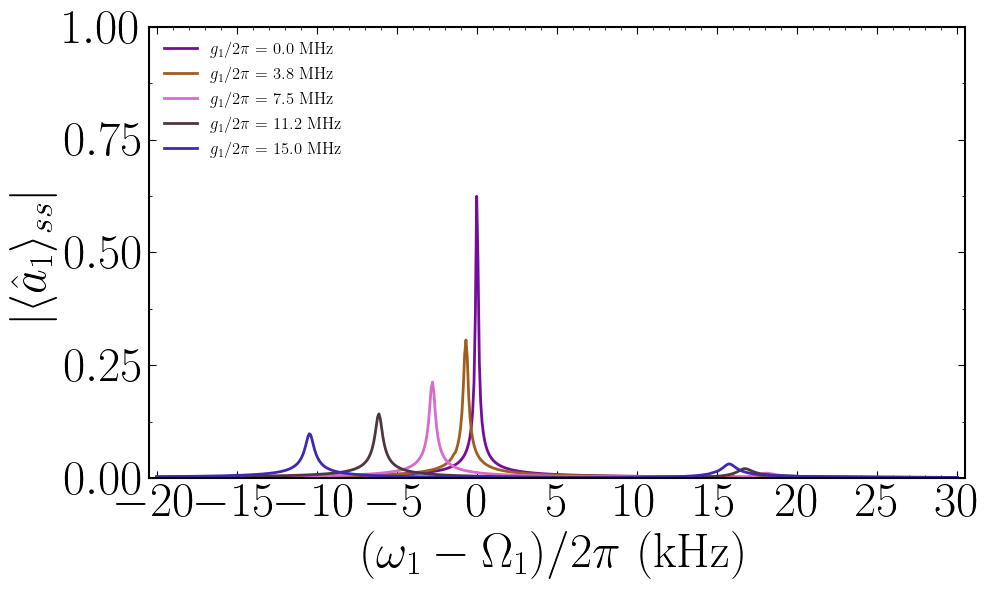

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

x_list = [(k) / (2*pi*1e6) for k in Delta_a_list]
y_list = [k / (2*pi*1e6) for k in galist]

z_list = results[0]

#axes.plot(x_list, A_xy_list_2[50], color='red', linestyle=':',
#          label=r'$g_1/2\pi =$ %.1f MHz' % y_list[50], lw=2.5)
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

for i in range(0,5,1):
    color = list(random.choice(range(256), size=3))
    axes.plot(x_list, z_list[i], color=rgb2hex(color[0],color[1],color[2]), linestyle='-',
            label=r'$g_1/2\pi = $ %.1f MHz' % y_list[i], lw=2.)

axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=35)
axes.set_ylabel(
    r'$\vert\langle \hat{a}_1\rangle_{ss}\vert$', rotation=90, fontsize=35)

axes.tick_params(axis='both', which='major', direction='in', labelsize=35)
axes.tick_params(axis='both', which='minor', direction='in', labelsize=35)
# axes.yaxis.tick_right()
axes.yaxis.set_ticks_position('both')
axes.legend(loc=2, fontsize=12, frameon=False)
#start, end = axes.get_xlim()
axes.xaxis.set_ticks(arange(-20, 41, 5))

axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

#axes.text(-900, 0.12, r"$n_2 = 1$", color='red', fontsize=25, rotation=-45)
#axes.text(-430, 0.26, r"$n_2 = 0$", color='red', fontsize=25, rotation=-45)
#axes.set_xlim(50, 150)
axes.set_ylim(0, 1)
#axes.set_yscale('log')

plt.margins(x=0.01, y=0.01)
plt.tight_layout()
#lt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_1D_a1ss_opt1.pdf')
plt.show()


In [14]:
coherent_dm(5,1).expm()

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[1.63217508 0.63188796 0.44856505 0.25122411 0.15166765]
 [0.63188796 1.63160096 0.44836132 0.25111001 0.15159876]
 [0.44856505 0.44836132 1.31828303 0.17825814 0.10761703]
 [0.25122411 0.25111001 0.17825814 1.09983556 0.06027218]
 [0.15166765 0.15159876 0.10761703 0.06027218 1.03638719]]

In [15]:
(coherent_dm(5,1).expm()).unit()

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.24294531 0.09405499 0.06676782 0.0373941  0.02257536]
 [0.09405499 0.24285986 0.0667375  0.03737712 0.02256511]
 [0.06676782 0.0667375  0.19622324 0.02653329 0.01601853]
 [0.0373941  0.03737712 0.02653329 0.16370786 0.00897137]
 [0.02257536 0.02256511 0.01601853 0.00897137 0.15426373]]

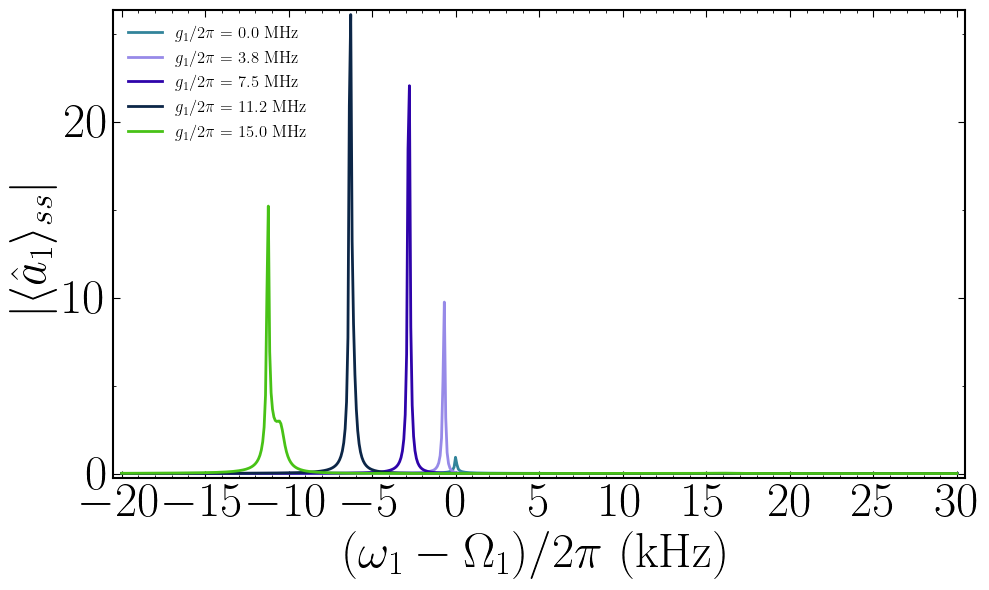

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

x_list = [(k) / (2*pi*1e6) for k in Delta_a_list]
y_list = [k / (2*pi*1e6) for k in galist]

z_list = results[1]

#axes.plot(x_list, A_xy_list_2[50], color='red', linestyle=':',
#          label=r'$g_1/2\pi =$ %.1f MHz' % y_list[50], lw=2.5)
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

for i in range(0,5,1):
    color = list(random.choice(range(256), size=3))
    axes.plot(x_list, z_list[i], color=rgb2hex(color[0],color[1],color[2]), linestyle='-',
            label=r'$g_1/2\pi = $ %.1f MHz' % y_list[i], lw=2.)

axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=35)
axes.set_ylabel(
    r'$\vert\langle \hat{a}_1\rangle_{ss}\vert$', rotation=90, fontsize=35)

axes.tick_params(axis='both', which='major', direction='in', labelsize=35)
axes.tick_params(axis='both', which='minor', direction='in', labelsize=35)
# axes.yaxis.tick_right()
axes.yaxis.set_ticks_position('both')
axes.legend(loc=2, fontsize=12, frameon=False)
#start, end = axes.get_xlim()
axes.xaxis.set_ticks(arange(-20, 41, 5))

axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

#axes.text(-900, 0.12, r"$n_2 = 1$", color='red', fontsize=25, rotation=-45)
#axes.text(-430, 0.26, r"$n_2 = 0$", color='red', fontsize=25, rotation=-45)
#axes.set_xlim(50, 150)
#axes.set_ylim(0, 0.2)
#axes.set_yscale('log')

plt.margins(x=0.01, y=0.01)
plt.tight_layout()
#lt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_1D_a1ss_opt1.pdf')
plt.show()


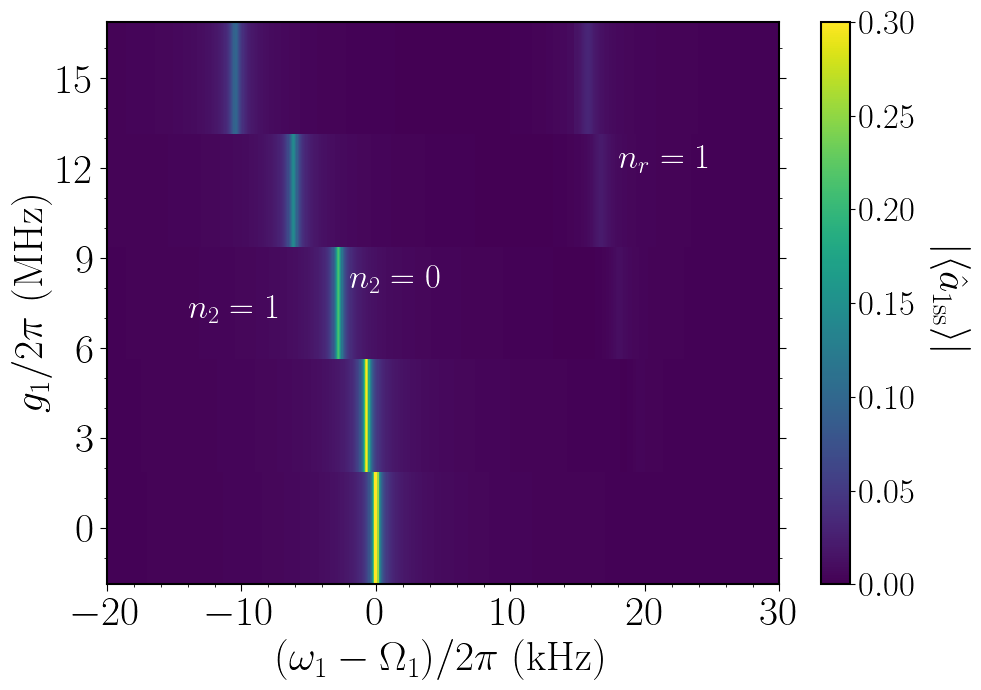

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))
# axes.imshow(neglist12_,origin="lower",aspect=1.0)
y_list = [k / (2*pi*1e6) for k in galist]
nrm = mpl.colors.Normalize(0, 0.3)
axes.pcolormesh(x_list, y_list, results[0],
                cmap=cm.viridis, norm=nrm, shading='auto')
#shift_curve = [-(k**2)/(2*pi*wr*1e3) for k in galist]
#yyy2 = [(-(k**2)/(2*pi*wr*1e3))-((2*k*gb)/(2*pi*wr*1e3)) for k in galist]
#axes.plot(shift_curve, y_list, '--', color='white', lw=2.0)
#axes.plot(yyy2, y_list, '--', color='white', lw=2.0)
axes.set_xlim(-20, 30)
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=30)
axes.set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=30)
axes.tick_params(axis='both', which='major', direction='out', labelsize=30)
axes.tick_params(axis='both', which='minor', labelsize=30)
axes.yaxis.set_ticks(arange(0, 15.1, 3))
axes.yaxis.set_ticks_position('both')

axes.text(-14, 7, r"$n_2 = 1$", color='white', fontsize=25)
axes.text(-2, 8, r"$n_2 = 0$", color='white', fontsize=25)
axes.text(18, 12, r"$n_r = 1$", color='white', fontsize=25)

axes.yaxis.set_minor_locator(AutoMinorLocator(3))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

plt.pcolormesh(x_list, y_list, results[0],cmap=cm.viridis, norm=nrm, shading='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(
    r'$\vert\langle \hat a_{1\mathrm{ss}} \rangle\vert$', labelpad = 40, rotation=270, fontsize=30)
plt.tight_layout()

#cp = axes.contour(x_list, y_list, A_xy_list)
#axes.clabel(cp, inline=True,
#            fontsize=16)

#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_2D_a1ss.pdf')
plt.show()


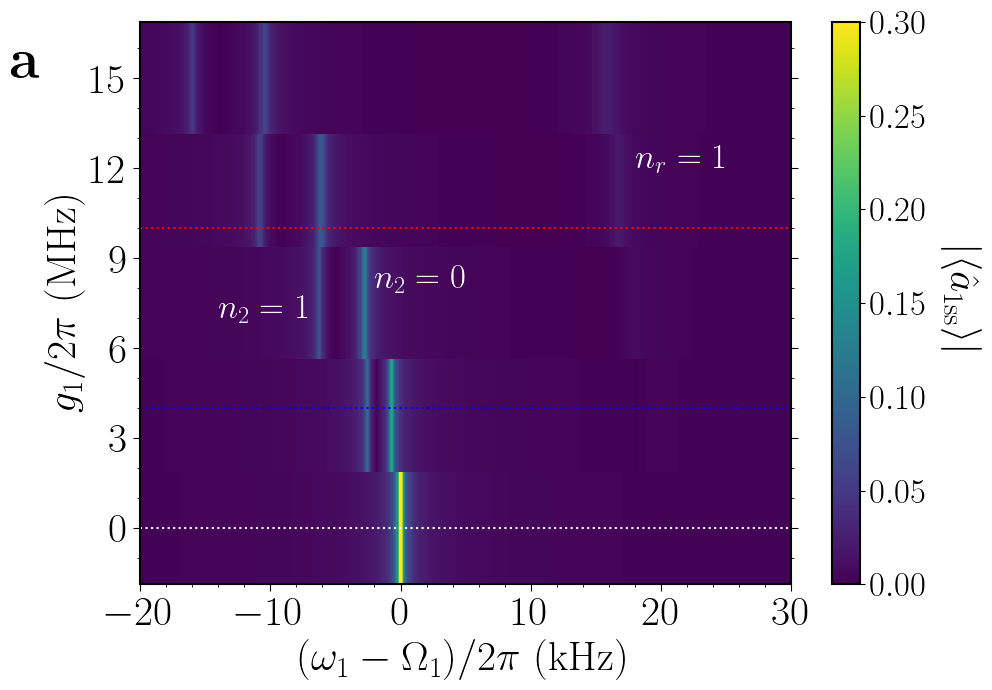

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))
# axes.imshow(neglist12_,origin="lower",aspect=1.0)
y_list = [k / (2*pi*1e6) for k in galist]
nrm = mpl.colors.Normalize(0, 0.3)
axes.pcolormesh(x_list, y_list, results[0],
                cmap=cm.viridis, norm=nrm, shading='auto')
#shift_curve = [-(k**2)/(2*pi*wr*1e3) for k in galist]
#yyy2 = [(-(k**2)/(2*pi*wr*1e3))-((2*k*gb)/(2*pi*wr*1e3)) for k in galist]
#axes.plot(shift_curve, y_list, '--', color='white', lw=2.0)
#axes.plot(yyy2, y_list, '--', color='white', lw=2.0)
axes.set_xlim(-20, 30)
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=30)
axes.set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=30)
axes.tick_params(axis='both', which='major', direction='out', labelsize=30)
axes.tick_params(axis='both', which='minor', labelsize=30)
axes.yaxis.set_ticks(arange(0, 15.1, 3))
axes.yaxis.set_ticks_position('both')

axes.text(-30, 15, r"$\mathbf{a}$", color='black', fontsize=40)
axes.text(-14, 7, r"$n_2 = 1$", color='white', fontsize=25)
axes.text(-2, 8, r"$n_2 = 0$", color='white', fontsize=25)
axes.text(18, 12, r"$n_r = 1$", color='white', fontsize=25)

axes.yaxis.set_minor_locator(AutoMinorLocator(3))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

plt.axhline(y=10.0, color='r', linestyle=':')
plt.axhline(y=4.0, color='b', linestyle=':')
plt.axhline(y=0.0, color='white', linestyle=':')

plt.pcolormesh(x_list, y_list, results[0],
               cmap=cm.viridis, norm=nrm, shading='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(
    r'$\vert\langle \hat a_{1\mathrm{ss}} \rangle\vert$', labelpad = 40, rotation=270, fontsize=30)
plt.tight_layout()

#cp = axes.contour(x_list, y_list, A_xy_list)
#axes.clabel(cp, inline=True,
#            fontsize=16)

#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_2D_a1ss.pdf')
plt.show()


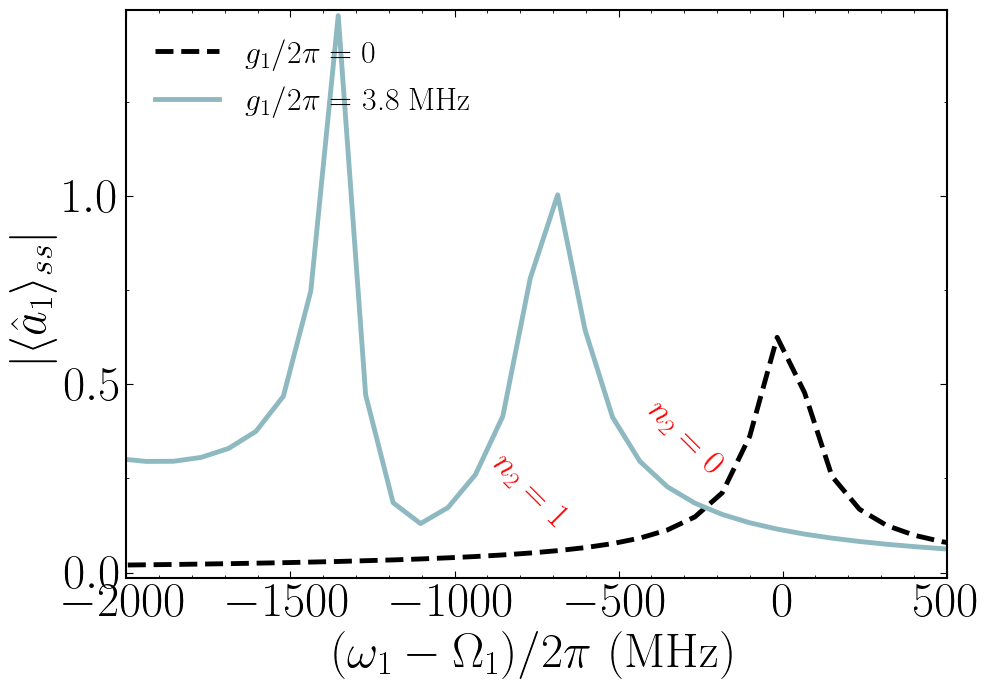

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

x_list = [k / (2*pi*1e3) for k in Delta_a_list]
y_list = [k / (2*pi*1e6) for k in galist]

axes.plot(x_list, results[0][0], color='black',
          linestyle='--', label=r'$g_1/2\pi =  0$', lw=3.5)
axes.plot(x_list, results[1][1], color=rgb2hex(color[0],color[1],color[2]), linestyle='-',
          label=r'$g_1/2\pi = $ %.1f MHz' % y_list[1], lw=3.5)


axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=35)
axes.set_ylabel(
    r'$\vert\langle \hat{a}_1\rangle_{ss}\vert$', rotation=90, fontsize=35)

axes.tick_params(axis='both', which='major', direction='in', labelsize=35)
axes.tick_params(axis='both', which='minor', direction='in', labelsize=35)
# axes.yaxis.tick_right()
axes.yaxis.set_ticks_position('both')
axes.legend(loc=2, fontsize=23, frameon=False)
#start, end = axes.get_xlim()
axes.xaxis.set_ticks(arange(-2000, 501, 500))

axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

axes.text(-900, 0.12, r"$n_2 = 1$", color='red', fontsize=25, rotation=-45)
axes.text(-430, 0.26, r"$n_2 = 0$", color='red', fontsize=25, rotation=-45)
axes.set_xlim(-2000, 500)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()
#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_1D_a1ss_opt2.pdf')
plt.show()


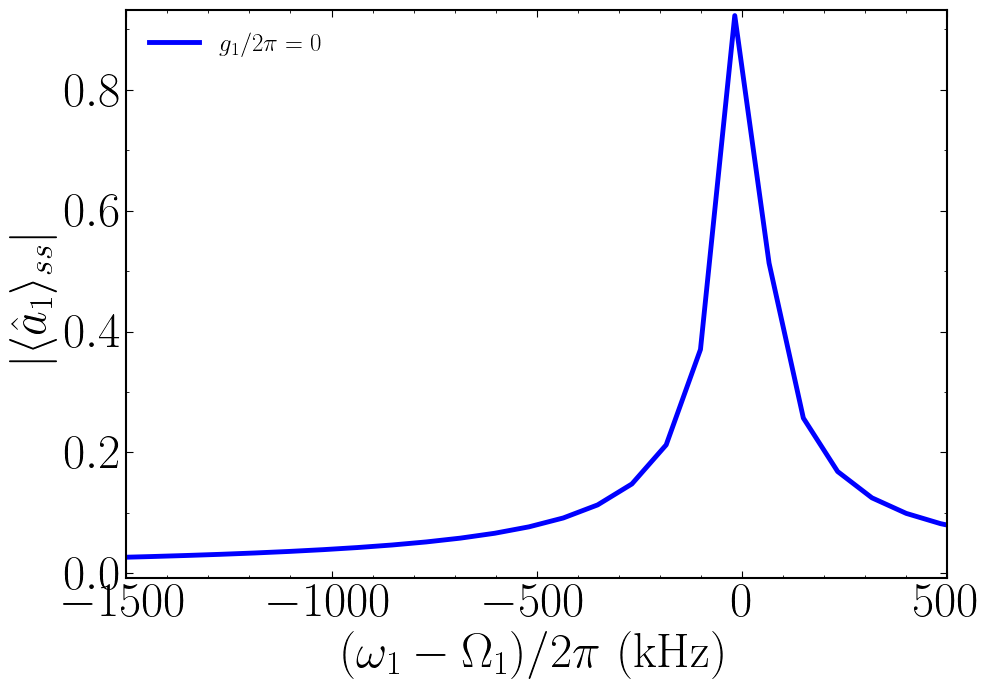

In [27]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, axes = plt.subplots(1, 1, figsize=(10, 7))

x_list = [k / (2*pi*1e3) for k in Delta_a_list]
y_list = [k / (2*pi*1e6) for k in galist]

linew = 3.5

axes.plot(x_list, results[1][0], color='blue', linestyle='-', label=r'$g_1/2\pi =  0$', lw=linew)
#axes.plot(x_list, results[1][10], color=lighten_color('blue',0.9), linestyle='-',
          #label=r'$g_1/2\pi = $ %.1f MHz' % y_list[10], lw=linew)
#axes.plot(x_list, results[1][20], color=lighten_color('blue',0.8), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[20], lw=linew)
#axes.plot(x_list, results[1][30], color=lighten_color('blue',0.7), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[30], lw=linew)
#axes.plot(x_list, results[1][40], color=lighten_color('blue',0.6), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[40], lw=linew)
#axes.plot(x_list, results[1][50], color=lighten_color('blue',0.5), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[50], lw=linew)
#axes.plot(x_list, results[1][60], color=lighten_color('blue',0.4), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[60], lw=linew)
#axes.plot(x_list, results[1][70], color=lighten_color('blue',0.3), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[70], lw=linew)
#axes.plot(x_list, results[1][80], color=lighten_color('blue',0.2), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[80], lw=linew)
#axes.plot(x_list, results[1][90], color=lighten_color('blue',0.1), linestyle='-',
          #label=r'$g_1/2\pi =$ %.1f MHz' % y_list[90], lw=linew)

axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=35)
axes.set_ylabel(
    r'$\vert\langle \hat{a}_1\rangle_{ss}\vert$', rotation=90, fontsize=35)

axes.tick_params(axis='both', which='major', direction='in', labelsize=35)
axes.tick_params(axis='both', which='minor', direction='in', labelsize=35)
# axes.yaxis.tick_right()
axes.yaxis.set_ticks_position('both')
axes.legend(loc=2, fontsize=18, frameon=False)
#start, end = axes.get_xlim()
axes.xaxis.set_ticks(arange(-2000, 501, 500))

axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('both')

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

#axes.text(-900, 0.12, r"$n_2 = 1$", color='blue', fontsize=25, rotation=-45)
#xes.text(-430, 0.26, r"$n_2 = 0$", color='blue', fontsize=25, rotation=-45)
axes.set_xlim(-1500, 500)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()
#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_1D_a1ss_opt3.pdf')
plt.show()


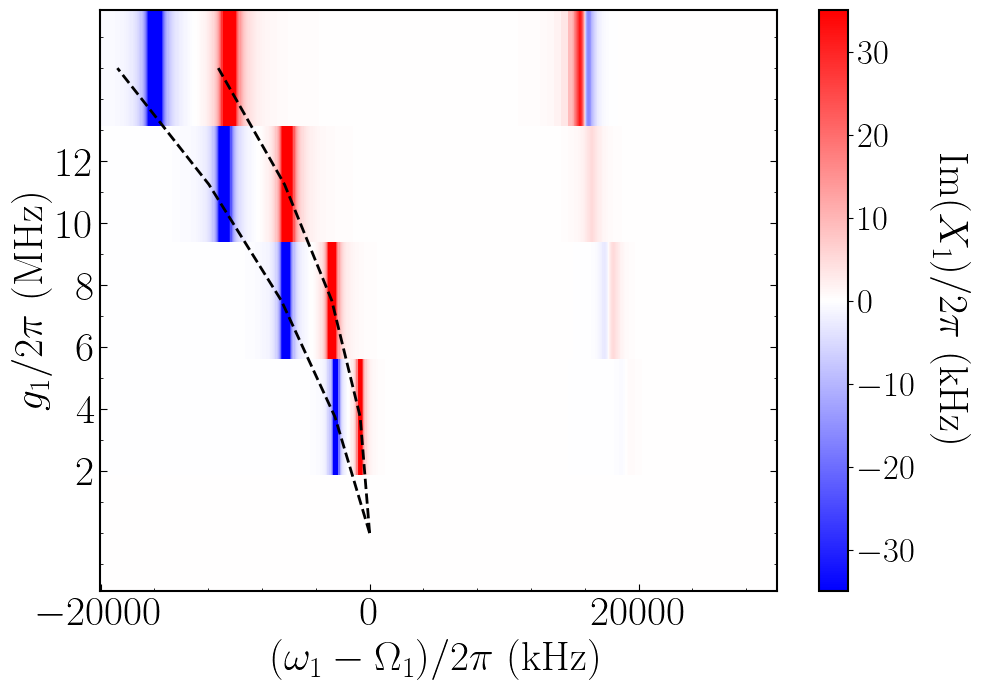

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

y_list = [k / (2*pi*1e6) for k in galist]
z_list = [[k / (2*pi*1e3) for k in i] for i in results[9]]

nrm = mpl.colors.Normalize(-35, 35)
axes.pcolormesh(x_list, y_list, z_list, cmap=cm.bwr, norm=nrm, shading='auto')
shift_curve = [-(k**2)/(2*pi*wr*1e3) for k in galist]
yyy2 = [(-(k**2)/(2*pi*wr*1e3))-((2*k*gb)/(2*pi*wr*1e3)) for k in galist]
axes.plot(shift_curve, y_list, '--', color='black', lw=2.0)
axes.plot(yyy2, y_list, '--', color='black', lw=2.0)
#axes.set_xlim(-1500, 500)

Lsize = 30
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)',
                rotation=0, fontsize=Lsize)
axes.set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=Lsize)
axes.tick_params(axis='both', which='major', direction='in', labelsize=Lsize)
axes.tick_params(axis='both', which='minor', direction='in', labelsize=Lsize)
axes.yaxis.set_ticks(arange(2, 12.1, 2))
plt.pcolormesh(x_list, y_list, z_list, cmap=cm.bwr, norm=nrm, shading='auto')
axes.yaxis.set_ticks_position('both')

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(r'Im$(X_1)/2\pi$ (kHz)',labelpad=40, rotation=270, fontsize=Lsize)
plt.tight_layout()

#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_2D_ImX.pdf')
plt.show()


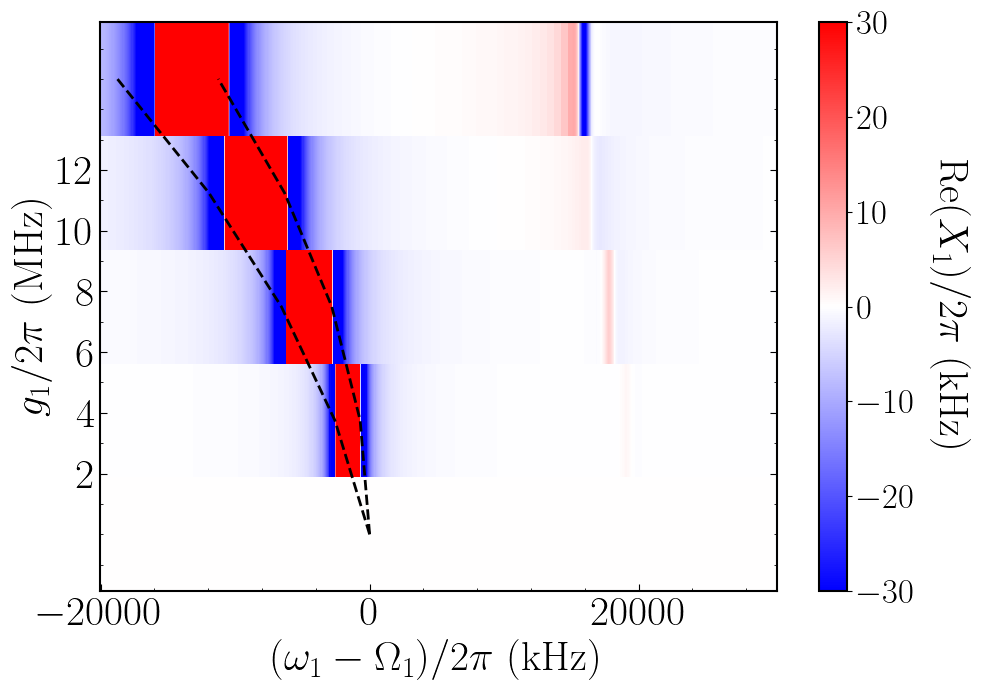

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

y_list = [k / (2*pi*1e6) for k in galist]
z_list = [[k / (2*pi*1e3) for k in i] for i in results[7]]

nrm = mpl.colors.Normalize(-30, 30)
axes.pcolormesh(x_list, y_list, z_list, cmap=cm.bwr, norm=nrm, shading='auto')
shift_curve = [-(k**2)/(2*pi*wr*1e3) for k in galist]
yyy2 = [(-(k**2)/(2*pi*wr*1e3))-((2*k*gb)/(2*pi*wr*1e3)) for k in galist]
axes.plot(shift_curve, y_list, '--', color='black', lw=2.0)
axes.plot(yyy2, y_list, '--', color='black', lw=2.0)
#axes.set_xlim(-1500, 500)

Lsize = 30
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)',
                rotation=0, fontsize=Lsize)
axes.set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=Lsize)
axes.tick_params(axis='both', which='major', direction='in', labelsize=Lsize)
axes.tick_params(axis='both', which='minor', direction='in', labelsize=Lsize)
axes.yaxis.set_ticks(arange(2, 12.1, 2))
axes.yaxis.set_ticks_position('both')
plt.pcolormesh(x_list, y_list, z_list, cmap=cm.bwr, norm=nrm, shading='auto')
cbar = plt.colorbar()

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(r'Re$(X_1)/2\pi$ (kHz)',labelpad=40, rotation=270, fontsize=Lsize)
plt.tight_layout()

#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_2D_ReX.pdf')
plt.show()


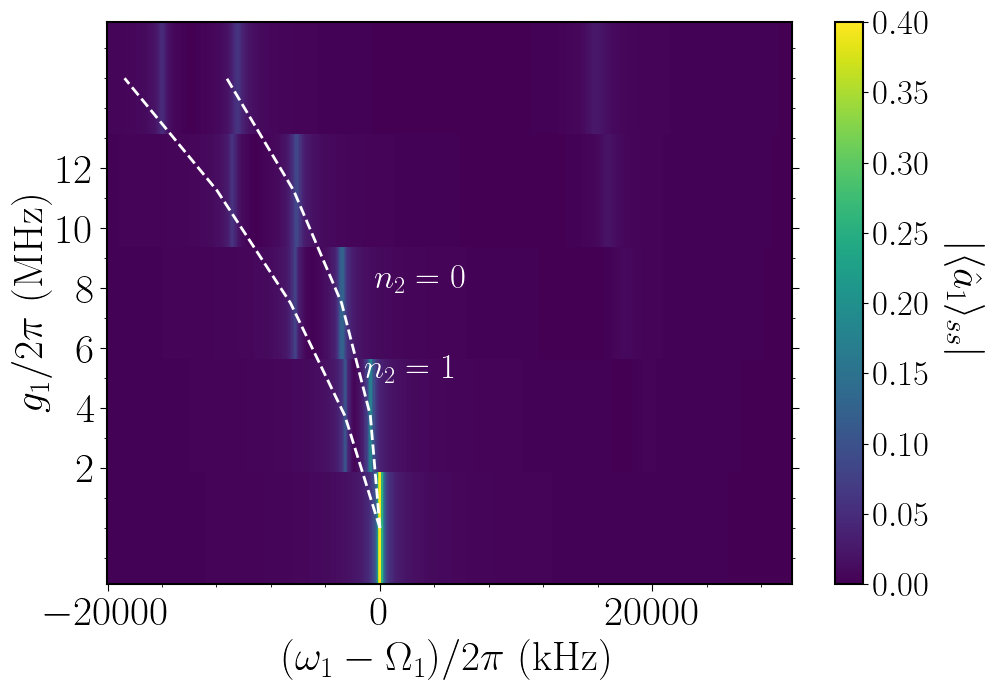

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))
# axes.imshow(neglist12_,origin="lower",aspect=1.0)
y_list = [k / (2*pi*1e6) for k in galist]
nrm = mpl.colors.Normalize(0, 0.4)
axes.pcolormesh(x_list, y_list, results[0],
                cmap=cm.viridis, norm=nrm, shading='auto')
shift_curve = [-(k**2)/(2*pi*wr*1e3) for k in galist]
yyy2 = [(-(k**2)/(2*pi*wr*1e3))-((2*k*gb)/(2*pi*wr*1e3)) for k in galist]
axes.plot(shift_curve, y_list, '--', color='white', lw=2.0)
axes.plot(yyy2, y_list, '--', color='white', lw=2.0)
#axes.set_xlim(-1500, 500)
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=30)
axes.set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=30)
axes.tick_params(axis='both', which='major', direction='out', labelsize=30)
axes.tick_params(axis='both', which='minor', labelsize=30)
axes.yaxis.set_ticks(arange(2, 12.1, 2))
axes.yaxis.set_ticks_position('both')
axes.text(-1200, 5, r"$n_2 = 1$", color='white', fontsize=25)
axes.text(-450, 8, r"$n_2 = 0$", color='white', fontsize=25)

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)


plt.pcolormesh(x_list, y_list, results[0],
               cmap=cm.viridis, norm=nrm, shading='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(
    r'$\vert\langle \hat a_1 \rangle_{ss}\vert$', labelpad = 40, rotation=270, fontsize=30)
plt.tight_layout()

#cp = axes.contour(x_list, y_list, A_xy_list)
#axes.clabel(cp, inline=True,
#            fontsize=16)

#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_cavity1field_2D_a1ss.pdf')
plt.show()


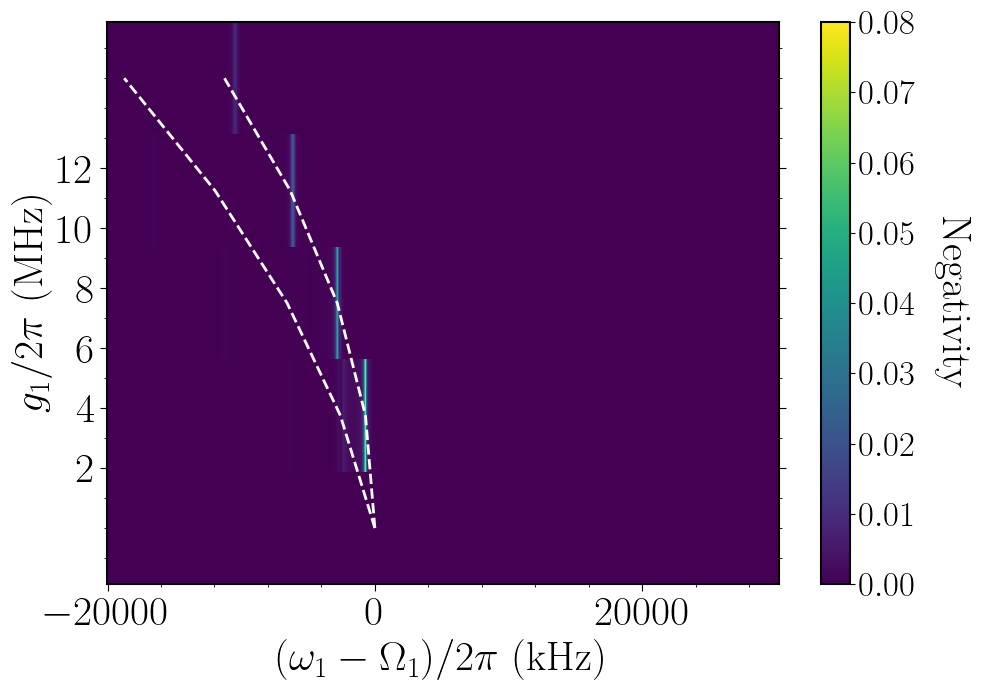

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))
# axes.imshow(neglist12_,origin="lower",aspect=1.0)
y_list = [k / (2*pi*1e6) for k in galist]
nrm = mpl.colors.Normalize(0, 0.08)
axes.pcolormesh(x_list, y_list, results[11],
                cmap=cm.viridis, norm=nrm, shading='auto')
yyy = [-(k**2)/(2*pi*wr*1e3) for k in galist]
yyy2 = [(-(k**2)/(2*pi*wr*1e3))-((2*k*gb)/(2*pi*wr*1e3)) for k in galist]
axes.plot(yyy, y_list, '--', color='white', lw=2.0)
axes.plot(yyy2, y_list, '--', color='white', lw=2.0)
#axes.set_xlim(-1500, 500)
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=30)
axes.set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=30)
axes.tick_params(axis='both', which='major', direction='out', labelsize=30)
axes.tick_params(axis='both', which='minor', labelsize=30)
axes.yaxis.set_ticks(arange(2, 12.1, 2))
axes.yaxis.set_ticks_position('both')

axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.xaxis.set_tick_params(length=5)
axes.yaxis.set_tick_params(length=5)

plt.pcolormesh(x_list, y_list, results[11],
               cmap=cm.viridis, norm=nrm, shading='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(r'Negativity', labelpad = 40, rotation=270, fontsize=30)
plt.tight_layout()

#plt.savefig(r'Images_from_Article_simulation_daleks\twomodes_negativity_2D.pdf')
plt.show()


In [ ]:

wa = 2 * pi * 5.1 * 1e9  # 5.1 GHz
wb = 2 * pi * 5.7 * 1e9  # 5.7 GHz
wr = 2 * pi * 100 * 1e6  # 100 MHz

ohm_a_initial = wa - 2 * pi * 1.5 * 1e6  # -1500 kHz
ohm_a_final = wa + 2 * pi * 0.5 * 1e6  # 500 kHz

ohm_b_initial = wb - 2 * pi * 1.5 * 1e6  # -1500 kHz
ohm_b_final = wb + 2 * pi * 0.5 * 1e6  # 500 kHz

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 180)
ohm_b_list = linspace(ohm_b_initial, ohm_b_final, 180)

# Dissipation rates
kappa_a = 2 * pi * 100 * 1e3   # 100 kHz
kappa_b = 2 * pi * 100 * 1e3   # 100 kHz
gamma = 100 * kappa_a          # 10 MHz

T = 0                              # Temperature
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Operators
N = 3
a = tensor(destroy(N), qeye(N), qeye(N))
b = tensor(qeye(N), destroy(N), qeye(N))
r = tensor(qeye(N), qeye(N), destroy(N))
Na = a.dag() * a
Nb = b.dag() * b
Nr = r.dag() * r
Xa = a.dag() + a
Xb = b.dag() + b
Xr = r.dag() + r

A_xy_list = []
A_xy_list_2 = []
B_xy_list = []
Na_xy_list = []
Nb_xy_list = []

pA0_xy_list = []
pA1_xy_list = []
pA2_xy_list = []

pB0_xy_list = []
pB1_xy_list = []
pB2_xy_list = []

S_plus_xy_list = []
S_minus_xy_list = []
reS_plus_xy_list = []
reS_minus_xy_list = []
imS_plus_xy_list = []
imS_minus_xy_list = []
neg_xy_list = []

DeltaE_xy_list = []
T_xy_list = []


for k in range(len(ohm_b_list)):

    # Field operators
    a_list = []
    b_list = []
    Na_list = []
    Nb_list = []
    a_list_2 = []

    # Entanglement
    S_plus_list = []
    S_minus_list = []
    reS_plus_list = []
    reS_minus_list = []
    imS_plus_list = []
    imS_minus_list = []
    neg_list = []

    DeltaE_list = []
    T_list = []

    # Populations
    pA_0_list = []
    pB_0_list = []
    pA_1_list = []
    pB_1_list = []
    pA_2_list = []
    pB_2_list = []

    for i in range(len(ohm_a_list)):

        ga = 2 * pi * 5 * 1e6
        gb = 2 * pi * 5 * 1e6          # Fixed at 5 MHz

        chiA = ((ga**2)/wr)
        chiB = ((gb**2)/wr)
        chiAB = ((gb*ga)/wr)

        E_a = 2 * pi * 80 * 1e3
        Ohm_a = ohm_a_list[i]

        E_b = 2 * pi * 80 * 1e3
        Ohm_b = ohm_b_list[k]

        Hvec = []
        Hvec.append((wa-Ohm_a) * Na)
        Hvec.append((wb-Ohm_b) * Nb)
        Hvec.append(wr * Nr)
        Hvec.append(-ga * Na * Xr)
        Hvec.append(-gb * Nb * Xr)
        Hvec.append(E_a * Xa)
        Hvec.append(E_b * Xb)
        H = 0
        for i in range(len(Hvec)):
            H = H + Hvec[i]

        c_ops = []
        rate = kappa_a
        if rate > 0.0:
            c_ops.append(sqrt(rate) * a)

        rate = kappa_b
        if rate > 0.0:
            c_ops.append(sqrt(rate) * b)

        rate = gamma * (1 + n_th_r)
        if rate > 0.0:
            c_ops.append(sqrt(rate) * r)

        #rate = gamma * n_th_r
        # if rate > 0.0:
        #    c_ops.append(sqrt(rate) * r.dag())

        rho_ss = steadystate(H, c_ops)
        chi_ss = rho_ss - tensor(ptrace(rho_ss, (0)),
                                 ptrace(rho_ss, (1)), ptrace(rho_ss, (2)))

        #S_plus_matrix  = chi_ss * b.dag() * b * a.dag()
        #S_minus_matrix = chi_ss * b.dag() * b * a

        #S_plus  = (2* ga * gb / wr) * S_plus_matrix.tr()
        #S_minus = (2* ga * gb / wr) * S_minus_matrix.tr()

        S_plus = (2 * ga * gb / wr) * expect(b.dag() * b * a.dag(), chi_ss)
        S_minus = (2 * ga * gb / wr) * expect(b.dag() * b * a, chi_ss)

        S_plus_list.append(abs(S_plus))
        S_minus_list.append(abs(S_minus))

        reS_plus_list.append(real(S_plus))
        reS_minus_list.append(real(S_minus))

        imS_plus_list.append(imag(S_plus))
        imS_minus_list.append(imag(S_minus))

        #a_ss = expect(a, rho_ss)
        a_ss = (rho_ss * a).tr()
        b_ss = expect(b, rho_ss)

        aada = expect(a * a.dag() * a, rho_ss)
        #adada = expect(a.dag() * a.dag() * a, rho_ss)
        #bbdb = expect(b * b.dag() * b, rho_ss)

        pol_arg = (r - r.dag()) * ((ga/wr) * Na + (gb/wr) * Nb)
        pol = pol_arg.expm()
        #pol_arg_half = (pol_arg / 2)
        #pol_half = pol_arg_half.expm()

        na_ss = expect(Na, rho_ss)
        nb_ss = expect(Nb, rho_ss)

        rho_p = pol * rho_ss * pol.dag()

        a_ss_2 = (E_a - ga * (rho_p * a * Xr).tr() - (2 * ga**2 / wr) * aada - S_minus) / \
            ((-ga**2 / wr) + 1j * (kappa_a/2) + 2 * chiAB * nb_ss - wa + Ohm_a)
        a_list_2.append(a_ss_2)

        a_list.append(a_ss)
        b_list.append(b_ss)

        Na_list.append(abs(na_ss))
        Nb_list.append(abs(nb_ss))

        rhoAB = ptrace(rho_ss, (0, 1))
        rhoA = ptrace(rhoAB, (0))
        rhoB = ptrace(rhoAB, (1))

        # Ground state
        p0A = (fidelity(rhoA, fock(N, 0)))**2
        p0B = (fidelity(rhoB, fock(N, 0)))**2
        # First excited state
        p1A = (fidelity(rhoA, fock(N, 1)))**2
        p1B = (fidelity(rhoB, fock(N, 1)))**2
        # Second excited state
        p2A = (fidelity(rhoA, fock(N, 2)))**2
        p2B = (fidelity(rhoB, fock(N, 2)))**2

        pA_0_list.append(p0A)
        pB_0_list.append(p0B)
        pA_1_list.append(p1A)
        pB_1_list.append(p1B)
        pA_2_list.append(p2A)
        pB_2_list.append(p2B)

        neg = negativity(rhoAB, 0, method='eigenvalues')
        neg_list.append(neg)

    #fig, axes = plt.subplots(1,1, figsize=(10,7))

    absA_list = [abs(k) for k in a_list]
    absA_list_2 = [abs(k) for k in a_list_2]
    absB_list = [abs(k) for k in b_list]
    x_list = [(k-wa) / (2*pi*1e3) for k in ohm_a_list]

    #maxA_2 = max(absA_list_2)

    #absA_list_norm_2 = [k / maxA_2  for k in absA_list_2]

    #axes.plot(x_list,absA_list,label=r'$\langle \hat{a} \rangle$', lw=2.0)
    #axes.plot(x_list,absB_list,label=r'$\langle \hat{b} \rangle$', lw=2.0)
    #axes.plot(x_list,Na_list,label=r'$\vert\langle \hat{a}^\dagger\hat{a} \rangle\vert$', lw=2.0)
    #axes.plot(x_list,Nb_list,label=r'$\langle \hat{b}^\dagger\hat{b} \rangle\vert$', lw=2.0)

    #xposition = [-chiA/ (2*pi*1e3),-chiA/ (2*pi*1e3)-chiAB/ (2*pi*1e3)]
    #plt.axvline(x=xposition[0], color='blue', linestyle='--')
    #plt.axvline(x=xposition[1], color='red', linestyle='--')

    #axes.set_xlabel(r'$\omega_a - \omega_a^d$ (kHz)',rotation=0,fontsize= 20.0)
    #axes.set_ylabel(r'$\langle \hat{a}\rangle$',rotation=90,fontsize= 22.0)
    #axes.tick_params(axis='both', which='major', labelsize=16)
    #axes.tick_params(axis='both', which='minor', labelsize=16)
    # axes.legend(loc=1,fontsize=16)

    A_xy_list.append(absA_list)
    A_xy_list_2.append(absA_list_2)
    B_xy_list.append(absB_list)
    Na_xy_list.append(Na_list)
    Nb_xy_list.append(Nb_list)

    pA0_xy_list.append(pA_0_list)
    pA1_xy_list.append(pA_1_list)
    pA2_xy_list.append(pA_2_list)

    pB0_xy_list.append(pB_0_list)
    pB1_xy_list.append(pB_1_list)
    pB2_xy_list.append(pB_2_list)

    S_plus_xy_list.append(S_plus_list)
    S_minus_xy_list.append(S_minus_list)
    reS_plus_xy_list.append(reS_plus_list)
    reS_minus_xy_list.append(reS_minus_list)
    imS_plus_xy_list.append(imS_plus_list)
    imS_minus_xy_list.append(imS_minus_list)
    neg_xy_list.append(neg_list)

    print('%d/99' % k)


In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

x_list = [(k-wa) / (2*pi*1e3) for k in ohm_a_list]
y_list = [(k-wb) / (2*pi*1e3) for k in ohm_b_list]

nrm = mpl.colors.Normalize(0, 0.4)
axes.pcolormesh(x_list, y_list, A_xy_list_2,
                cmap=cm.viridis, norm=nrm, shading='auto')
shift_curve = [-(ga**2)/(2*pi*wr*1e3) for k in ohm_b_list]
yyy2 = [(-(ga**2)/(2*pi*wr*1e3))-((2*ga*gb)/(2*pi*wr*1e3)) for k in ohm_b_list]
axes.plot(shift_curve, y_list, ':', color='white', lw=2.0)
axes.plot(yyy2, y_list, ':', color='white', lw=2.0)


axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=30)
axes.set_ylabel(r'$(\omega_2 - \Omega_2)/2\pi$ (kHz)',
                rotation=90, fontsize=30)
axes.tick_params(axis='both', which='major', direction='out', labelsize=30)
axes.tick_params(axis='both', which='minor', labelsize=30)
axes.yaxis.set_ticks(arange(-1500, 501, 500))
axes.yaxis.set_ticks_position('both')
axes.text(-1150, -700, r"$n_2 = 1$", color='white', fontsize=25)
axes.text(0, -700, r"$n_2 = 0$", color='white', fontsize=25)

axes.set_xlim(-1500, 500)
axes.set_ylim(-1000, 500)

plt.pcolormesh(x_list, y_list, A_xy_list,
               cmap=cm.viridis, norm=nrm, shading='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(
    r'$\vert\langle \hat a_1 \rangle_{ss}\vert$', rotation=90, fontsize=30)
plt.tight_layout()

plt.savefig('a1_ss_01.pdf')
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

x_list = [(k-wa) / (2*pi*1e3) for k in ohm_a_list]
y_list = [(k-wb) / (2*pi*1e3) for k in ohm_b_list]

nrm = mpl.colors.Normalize(0, 0.4)
axes.pcolormesh(x_list, y_list, B_xy_list,
                cmap=cm.viridis, norm=nrm, shading='auto')
shift_curve = [-(ga**2)/(2*pi*wr*1e3) for k in ohm_b_list]
yyy2 = [(-(ga**2)/(2*pi*wr*1e3))-((2*ga*gb)/(2*pi*wr*1e3)) for k in ohm_b_list]
axes.plot(y_list, shift_curve, ':', color='white', lw=2.0)
axes.plot(y_list, yyy2, ':', color='white', lw=2.0)

axes.set_xlim(-1500, 500)
axes.set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (kHz)', rotation=0, fontsize=30)
axes.set_ylabel(r'$(\omega_2 - \Omega_2)/2\pi$ (kHz)',
                rotation=90, fontsize=30)
axes.tick_params(axis='both', which='major', direction='out', labelsize=30)
axes.tick_params(axis='both', which='minor', labelsize=30)
axes.yaxis.set_ticks(arange(-1500, 501, 500))
axes.yaxis.set_ticks_position('both')
axes.text(0, -950, r"$n_1 = 0$", color='white', fontsize=25)
axes.text(0, -50, r"$n_1 = 1$", color='white', fontsize=25)
plt.pcolormesh(x_list, y_list, B_xy_list,
               cmap=cm.viridis, norm=nrm, shading='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel(
    r'$\vert\langle \hat a_2 \rangle_{ss}\vert$', rotation=90, fontsize=30)
plt.tight_layout()

plt.savefig('a2_ss_01.pdf')
plt.show()
